In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

# Observe shape
print(f"Train dataset: {df_train.shape}")

# Count NaN values
print("\n--- Train NaN Values ---")
print(df_train.isnull().sum().sort_values(ascending=False))

'''We can see that there are a lot of Cabin NaN values and some more on Age.
- For Cabin, first approach is to drop the feature (there is like a 70% of missing values), or 
a hard transformation (1 = thereIsCabin, 0 = thereIsNoCabin...).
- For Age, we should study the best way to impute the missing values. First approach is to use
the mean value, but since age seems to be an important feature (maybe kids have better chances
to survive), we should improve this. Maybe using the name (Mr, Mrs, Master for kids...)
'''

Train dataset: (891, 11)

--- Train NaN Values ---
Cabin       687
Age         177
Embarked      2
Name          0
Pclass        0
Survived      0
Sex           0
Parch         0
SibSp         0
Fare          0
Ticket        0
dtype: int64


'We can see that there are a lot of Cabin NaN values and some more on Age.\n- For Cabin, first approach is to drop the feature (there is like a 70% of missing values), or \na hard transformation (1 = thereIsCabin, 0 = thereIsNoCabin...).\n- For Age, we should study the best way to impute the missing values. First approach is to use\nthe mean value, but since age seems to be an important feature (maybe kids have better chances\nto survive), we should improve this. Maybe using the name (Mr, Mrs, Master for kids...)\n'

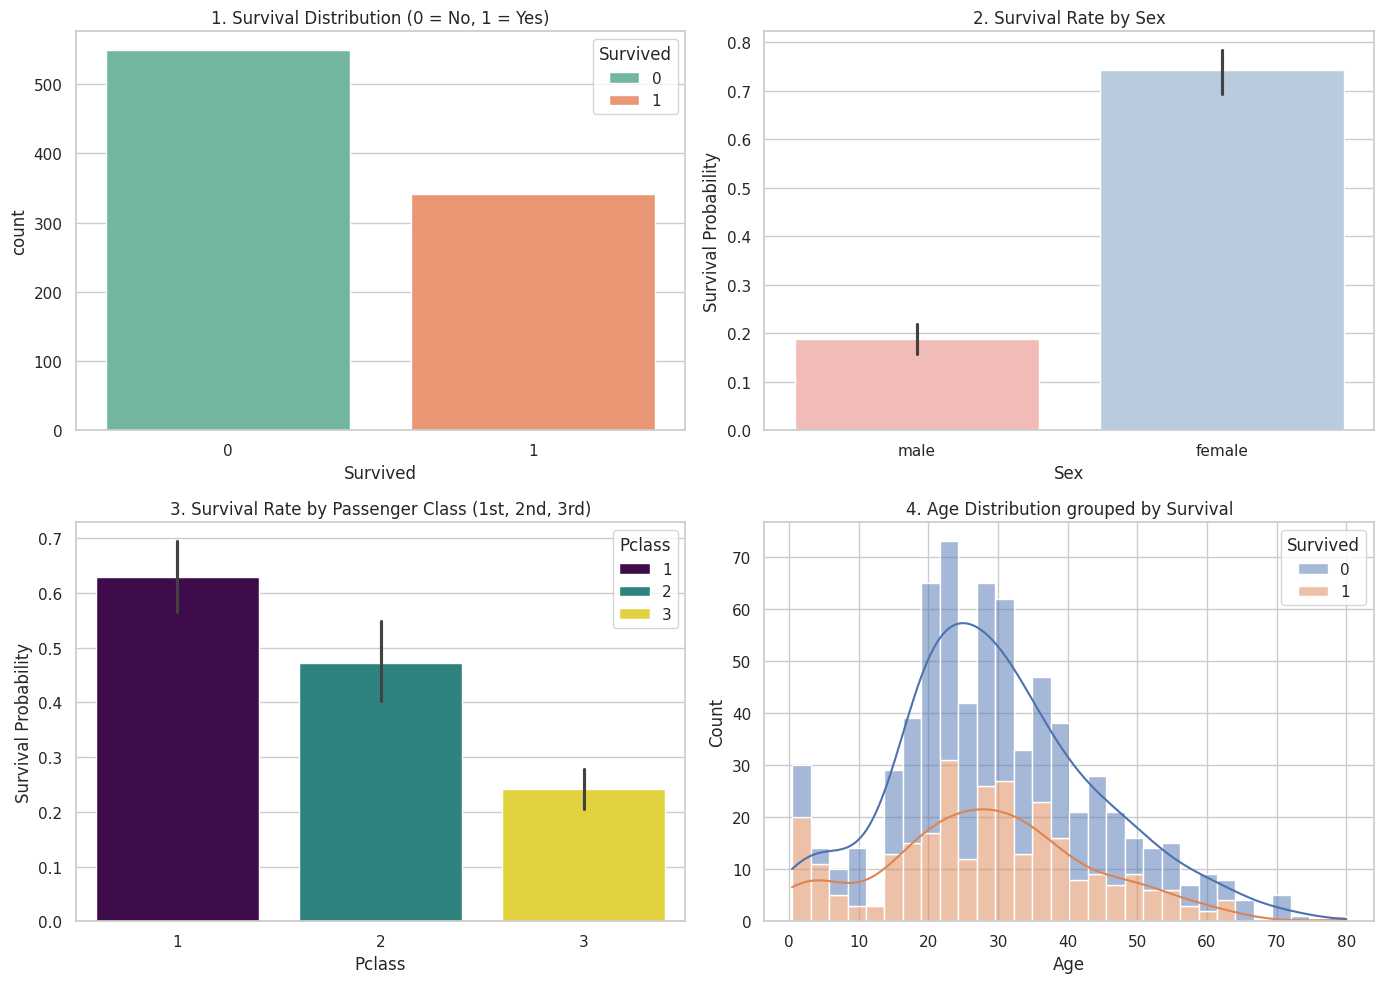

'Best insights from these plots, the target variable is well balanced (not perfect but manag\neable), there is a strong correlation between women and survival rate (~73% of women survived). \nThere is also an observable correlation between classes and survival rates, and the age distribution\nshows us that most of the children survived, but for elder ages there is not a visible correlation.'

In [36]:
sns.set_theme(style="whitegrid")

# Create a large figure with 4 subplots (2 rows by 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Target Variable Distribution
sns.countplot(data=df_train, x='Survived', hue='Survived',palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('1. Survival Distribution (0 = No, 1 = Yes)')

# 2. The Gender factor
sns.barplot(data=df_train, x='Sex', y='Survived', hue='Sex', palette='Pastel1', ax=axes[0, 1])
axes[0, 1].set_title('2. Survival Rate by Sex')
axes[0, 1].set_ylabel('Survival Probability')

# 3. The Socioeconomic factor
sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Pclass', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('3. Survival Rate by Passenger Class (1st, 2nd, 3rd)')
axes[1, 0].set_ylabel('Survival Probability')

# 4. The Age factor (Distribution)
sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('4. Age Distribution grouped by Survival')

# Adjust layout to prevent overlapping text
plt.tight_layout()
plt.show()

'''Best insights from these plots, the target variable is well balanced (not perfect but manag
eable), there is a strong correlation between women and survival rate (~73% of women survived). 
There is also an observable correlation between classes and survival rates, and the age distribution
shows us that most of the children survived, but for elder ages there is not a visible correlation.'''

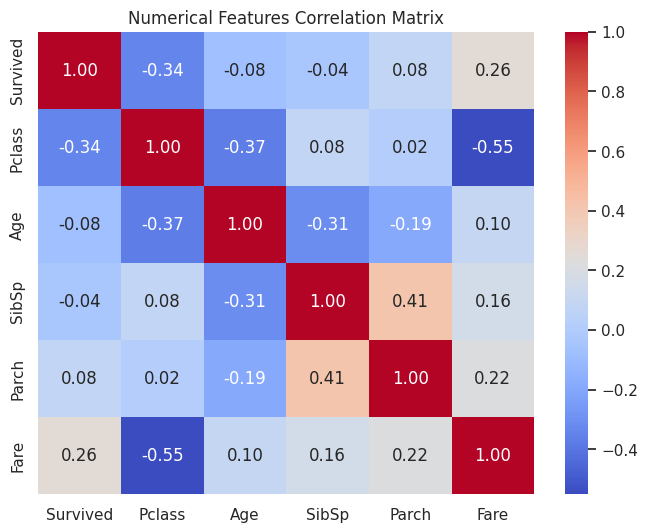

'We can observe some correlations (negative correlation between class and survived, which will\nbe quite useful, and the strongest is between class and fare, which is obvious because \npoorest classes will spend less money)'

In [35]:
# Filter only numerical columns for the correlation matrix to avoid errors
num_cols = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))

# Plot the heatmap: annot=True shows the numbers, cmap sets the color scheme
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Features Correlation Matrix')

plt.show()

'''We can observe some correlations (negative correlation between class and survived, which will
be quite useful, and the strongest is between class and fare, which is obvious because 
poorest classes will spend less money)'''

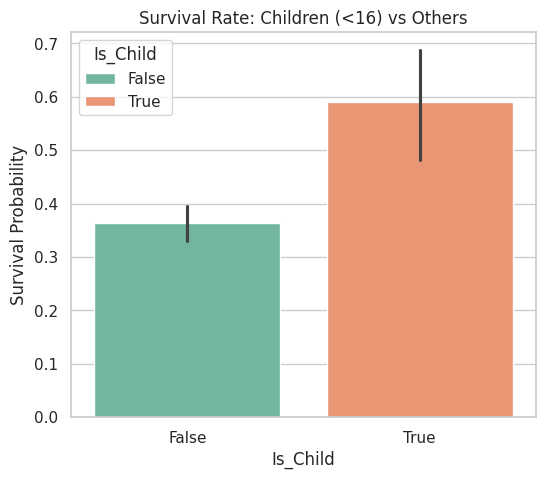

In [34]:
# Plotting Survival rate for children (<16)
plt.figure(figsize=(6, 5))
sns.set_theme(style="whitegrid")

sns.barplot(
    data=df_train.assign(Is_Child=df_train['Age'] < 16), 
    x='Is_Child', 
    y='Survived', 
    hue='Is_Child',
    palette='Set2'
)

plt.title('Survival Rate: Children (<16) vs Others')
plt.ylabel('Survival Probability')

plt.show()

'''There is an obvious correlation between children (age < 16) and survival rate'''

In [23]:
from sklearn.pipeline import Pipeline

pre-processing = Pipeline(steps=[
    ("Cabin", )
])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
